# Heart Disease Prediction

The dataset attributes:
1. age = age in years
2. sex = (1=male, 0=female)
3. cp = chest pain type
4. tresbpsr = testing blood pressure(in mm Hg on admission to the hospital)
5. chol = serum cholestoral in mg/dl
6. fbs = fasting blood sugar > 120mg/dl (1=true, 0=false)
7. restecg = resting electrocardiographic results
8. thalach = maximum heart rate achieved
9. exang = exercise induced angina (1=yes, 0=no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope = the slope of the peak exercise ST segment
12. ca = number of major vessels (0-3) colored by flourosopy
13. thal = 3=normal, 6=fixed defect, 7=reversable defect
14. target = 1=heart disease, 0=no heart disease

## Data Exploration

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Analyze the age

We want to see the count of each age group

In [7]:
df.age.value_counts()[:10] #we want 10 rows

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

Let's plot a bar graph for the age distribution

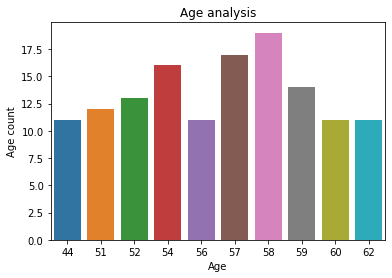

In [8]:
sns.barplot(x=df.age.value_counts()[:10].index, y = df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age count')
plt.title('Age analysis')
plt.show()

Check those who have heart disease vs those who do not have

In [11]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Check heart disease distribution

In [12]:
no_disease = len(df[df.target ==0])
have_disease = len(df[df.target ==1])
print('Percentage of patients with no heart disease: {:.2f}%'.format((no_disease/(len(df.target)))*100))
print('Percentage of patients with heart disease: {:.2f}%'.format((have_disease/(len(df.target)))*100))

Percentage of patients with no heart disease: 45.54%
Percentage of patients with heart disease: 54.46%


Check percentage of male and female

In [13]:
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])
print('% of female patients: {:.2f}%'.format((count_female/(len(df.sex)))*100))
print('% of male patients: {:.2f}%'.format((count_male/(len(df.sex)))*100))

% of female patients: 31.68%
% of male patients: 68.32%


Recategorize the age and check the distribution

In [15]:
young_ages = df[(df.age>=29) & (df.age<40)]
middle_ages = df[(df.age>=40) & (df.age<55)]
old_ages = df[(df.age>=55)]
print('young ages', len(young_ages))
print('middle ages', len(middle_ages))
print('old ages', len(old_ages))

young ages 16
middle ages 128
old ages 159


Let's make a pie chart of the age distribution

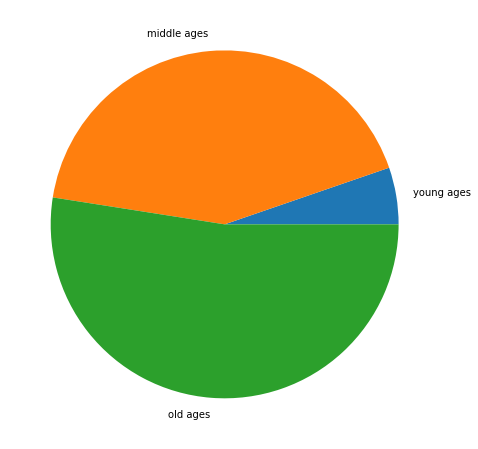

In [18]:
colors = ['blue', 'green', 'red']
explore = [0.1, 0.1, 0.1]
plt.figure(figsize=(8,8))
plt.pie([len(young_ages), len(middle_ages), len(old_ages)], labels=['young ages', 'middle ages', 'old ages'])
plt.show()

Chest pain analysis

In [19]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Check unique values of target variable

In [20]:
df.target.unique()

array([1, 0])

View a bar chart of the target variable

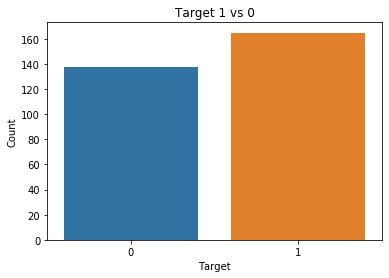

In [22]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 vs 0')
plt.show()

View correlation table

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Model building

## (1) Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
X = df.drop(['target'], axis = 1)
y = df.target.values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Test Accuracy {:.2f}%'.format(lr.score(X_test, y_test)*100))

Test Accuracy 81.97%


### (2) KNN Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('KNN accuracy: {:.2f}%'.format(knn.score(X_test, y_test)*100))

KNN accuracy: 59.02%


### (3) SVM Model

In [28]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train, y_train)
print('KNN accuracy: {:.2f}%'.format(svm.score(X_test, y_test)*100))

KNN accuracy: 54.10%


### (4) Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print('NB accuracy: {:.2f}%'.format(nb.score(X_test, y_test)*100))

NB accuracy: 81.97%


### (5) Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
print('Random Forest Accuracy : {:.2f}%'.format(rf.score(X_test, y_test)*100))

Random Forest Accuracy : 83.61%


Use the forest's predict method on the test data

In [33]:
predictions = rf.predict(X_test)

Calculate the absolute errors

In [40]:
errors = abs(predictions - y_test)

Print out the Mean Absolute Error (MAE)

In [36]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.16 degrees.
